# Introdução com Keras

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Bibliotecas básicas

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow
from tensorflow import keras

import warnings
warnings.filterwarnings('ignore')

### Carregando o dataset

In [3]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino), (imagens_teste, identificacoes_teste)) = dataset.load_data()

4423680/4422102 [==============================] - 0s 0us/step


### Exploração dos dados

In [4]:
print(f'Shape treino: {imagens_treino.shape}')
print(f'Shape teste: {imagens_teste.shape}')

Shape treino: (60000, 28, 28)
Shape teste: (10000, 28, 28)


### Exibição dos dados

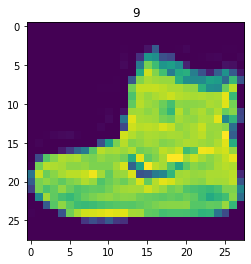

In [5]:
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])
plt.show()

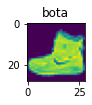

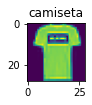

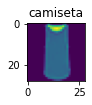

In [6]:
total_labels = 10
nome_classificacoes = ['camiseta', 'calça', 'pullover', 'vestido', 'casaco', 'sandália', 'camisa', 'tênis', 'bolsa', 'bota']


for imagem in range(3):
  plt.subplot(2, 5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nome_classificacoes[identificacoes_treino[imagem]])
  plt.show()  

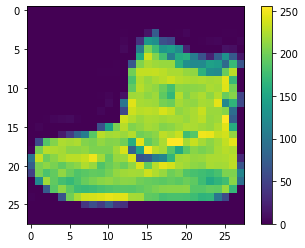

In [7]:
plt.imshow(imagens_treino[0])
plt.colorbar()
plt.show()

### Criando o modelo


     modelo sequencia
                        entrada
                        processamento
                        saída

In [8]:
imagens_treino_normalizado = imagens_treino/255.0

In [9]:
modelo = keras.Sequential([
                           keras.layers.Flatten(input_shape=(28, 28)),
                           keras.layers.Dense(256, activation=tensorflow.nn.relu),
                           keras.layers.Dropout(0.2),
                           keras.layers.Dense(total_labels, activation=tensorflow.nn.softmax)
                           ])
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
historico = modelo.fit(imagens_treino_normalizado, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 6s 4ms/step - loss: 0.6576 - accuracy: 0.7690 - val_loss: 0.3936 - val_accuracy: 0.8578
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4103 - accuracy: 0.8513 - val_loss: 0.3789 - val_accuracy: 0.8604
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3639 - accuracy: 0.8665 - val_loss: 0.4178 - val_accuracy: 0.8415
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3414 - accuracy: 0.8734 - val_loss: 0.3378 - val_accuracy: 0.8788
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3250 - accuracy: 0.8799 - val_loss: 0.3402 - val_accuracy: 0.8787


### Avaliando o modelo

In [10]:
testes = modelo.predict(imagens_teste)
print(f'Predito: {np.argmax(testes[0])}')
print(f'Real: {identificacoes_teste[0]}')

Predito: 9
Real: 9


In [11]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste, identificacoes_teste)
print(f'Perda: {perda_teste} | Acurácia: {acuracia_teste}')

313/313 [==============================] - 1s 2ms/step - loss: 51.3830 - accuracy: 0.8661
Perda: 51.383026123046875 | Acurácia: 0.866100013256073


### Visualização das acurácias de treino e validação por época

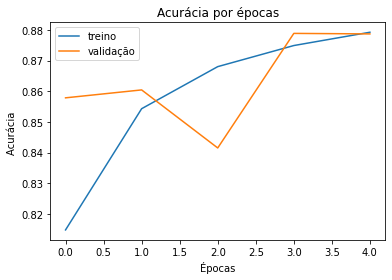

In [12]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia ')
plt.legend(['treino', 'validação'])
plt.show()

### Visualização das perdas de treino e validação por época

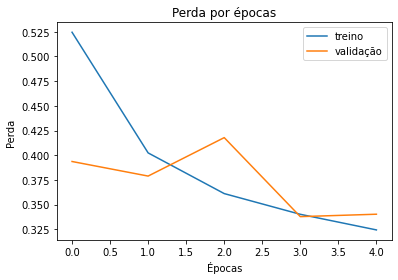

In [13]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('Épocas')
plt.ylabel('Perda ')
plt.legend(['treino', 'validação'])
plt.show()

### Salvando o modelo

In [14]:
modelo.save('/content/drive/MyDrive/Colab Notebooks/Alura/modelo.h5')

### Carregando o modelo

In [15]:
from tensorflow.keras.models import load_model
modelo_salvo = load_model('/content/drive/MyDrive/Colab Notebooks/Alura/modelo.h5')

### Predição

In [16]:
testes_modelo_salvo = modelo_salvo.predict(imagens_teste)
print(f'Predito: {np.argmax(testes_modelo_salvo[0])}')

Predito: 9


# Parte 2

### Resumo do modelo

In [17]:
sumario_do_modelo = modelo.summary()
sumario_do_modelo

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


### Pesos da camada 1

In [18]:
pesos_dense_1 = modelo.layers[1].get_weights()[0]
pesos_dense_1

array([[ 0.01012997,  0.11015033,  0.00935624, ...,  0.0342704 ,
         0.0324109 ,  0.01354878],
       [ 0.03389582,  0.07113414, -0.03362895, ..., -0.04065632,
        -0.08135889, -0.081861  ],
       [-0.04982436,  0.18748954, -0.02009995, ..., -0.08665759,
        -0.06349906, -0.0777782 ],
       ...,
       [ 0.00996395, -0.09849817,  0.13379574, ..., -0.07061328,
         0.02630072, -0.05171257],
       [ 0.04187987, -0.01190138,  0.27581355, ..., -0.20320997,
         0.03715806, -0.0237327 ],
       [-0.05407104, -0.05439032,  0.04387961, ..., -0.21937874,
        -0.06018431,  0.00432681]], dtype=float32)

In [19]:
pesos_dense_1.shape

(784, 256)

### Vieses da camada 1

In [20]:
vieses_dense_1 = modelo.layers[1].get_weights()[1] #viés mede a distância da classe correta
vieses_dense_1[:10]

array([-0.03164108,  0.12694666,  0.29062283,  0.23216376, -0.10695583,
       -0.29275426,  0.07360135,  0.3429711 ,  0.16738923, -0.19327267],
      dtype=float32)

In [21]:
vieses_dense_1.shape

(256,)

### Zerando os pesos

In [22]:
pesos_dense_1_zerados = np.zeros(pesos_dense_1.shape)
print(pesos_dense_1_zerados.shape)
pesos_dense_1_zerados

(784, 256)


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [23]:
modelo.layers[1].set_weights([pesos_dense_1_zerados, vieses_dense_1])
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
historico = modelo.fit(imagens_treino_normalizado, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6926 - accuracy: 0.7545 - val_loss: 0.4247 - val_accuracy: 0.8410
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4165 - accuracy: 0.8455 - val_loss: 0.3783 - val_accuracy: 0.8660
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3676 - accuracy: 0.8664 - val_loss: 0.3482 - val_accuracy: 0.8721
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3568 - accuracy: 0.8682 - val_loss: 0.3500 - val_accuracy: 0.8729
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3370 - accuracy: 0.8759 - val_loss: 0.3404 - val_accuracy: 0.8775


### Visualizando as acurácias e perdas

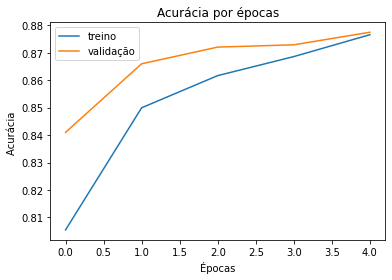

In [24]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia ')
plt.legend(['treino', 'validação'])
plt.show()

### Deixando os pesos aleatórios

In [25]:
pesos_dense_1_aleatorios = np.random.rand(784, 256)
print(pesos_dense_1_aleatorios.shape)
pesos_dense_1_aleatorios

(784, 256)


array([[0.53082924, 0.3917996 , 0.75237631, ..., 0.31294595, 0.51809002,
        0.14597907],
       [0.0740488 , 0.2732697 , 0.72187693, ..., 0.9449657 , 0.18182091,
        0.05417285],
       [0.05671552, 0.58492917, 0.36784635, ..., 0.91553132, 0.30292022,
        0.0599394 ],
       ...,
       [0.74396453, 0.47349202, 0.50518712, ..., 0.47887205, 0.9953363 ,
        0.41961713],
       [0.50032737, 0.83452452, 0.24764337, ..., 0.75266572, 0.713041  ,
        0.08647026],
       [0.79679262, 0.24238073, 0.69986278, ..., 0.82978826, 0.73123547,
        0.92423825]])

In [26]:
modelo.layers[1].set_weights([pesos_dense_1_aleatorios, vieses_dense_1])
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
historico = modelo.fit(imagens_treino_normalizado, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 212.4749 - accuracy: 0.2954 - val_loss: 15.5365 - val_accuracy: 0.7448
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 36.9285 - accuracy: 0.6129 - val_loss: 9.6866 - val_accuracy: 0.7673
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 16.6989 - accuracy: 0.6850 - val_loss: 6.3249 - val_accuracy: 0.7832
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 8.3846 - accuracy: 0.7258 - val_loss: 3.7189 - val_accuracy: 0.8112
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 4.1652 - accuracy: 0.7514 - val_loss: 2.4144 - val_accuracy: 0.7922


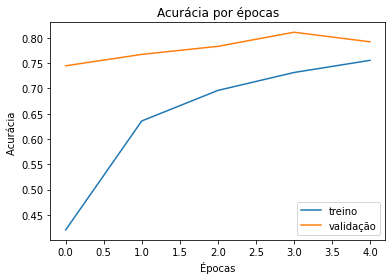

In [27]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia ')
plt.legend(['treino', 'validação'])
plt.show()

### Configuração do modelo

In [28]:
modelo.get_config()

{'layers': [{'class_name': 'InputLayer',
   'config': {'batch_input_shape': (None, 28, 28),
    'dtype': 'float32',
    'name': 'flatten_input',
    'ragged': False,
    'sparse': False}},
  {'class_name': 'Flatten',
   'config': {'batch_input_shape': (None, 28, 28),
    'data_format': 'channels_last',
    'dtype': 'float32',
    'name': 'flatten',
    'trainable': True}},
  {'class_name': 'Dense',
   'config': {'activation': 'relu',
    'activity_regularizer': None,
    'bias_constraint': None,
    'bias_initializer': {'class_name': 'Zeros', 'config': {}},
    'bias_regularizer': None,
    'dtype': 'float32',
    'kernel_constraint': None,
    'kernel_initializer': {'class_name': 'GlorotUniform',
     'config': {'seed': None}},
    'kernel_regularizer': None,
    'name': 'dense',
    'trainable': True,
    'units': 256,
    'use_bias': True}},
  {'class_name': 'Dropout',
   'config': {'dtype': 'float32',
    'name': 'dropout',
    'noise_shape': None,
    'rate': 0.2,
    'seed': None

### Viéses zerados com pesos zerados

In [29]:
vieses_dense_1_zerados = np.zeros((256,))
print(vieses_dense_1_zerados.shape)
vieses_dense_1_zerados

(256,)


array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [30]:
modelo.layers[1].set_weights([pesos_dense_1_zerados, vieses_dense_1_zerados])
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
historico = modelo.fit(imagens_treino_normalizado, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.5305 - accuracy: 0.0997 - val_loss: 2.3312 - val_accuracy: 0.0995
Epoch 2/5
1500/1500 [==============================] - 4s 3ms/step - loss: 2.3161 - accuracy: 0.1019 - val_loss: 2.3035 - val_accuracy: 0.0995
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3032 - accuracy: 0.0983 - val_loss: 2.3027 - val_accuracy: 0.0995
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.1001 - val_loss: 2.3027 - val_accuracy: 0.0983
Epoch 5/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3027 - accuracy: 0.0990 - val_loss: 2.3027 - val_accuracy: 0.0957


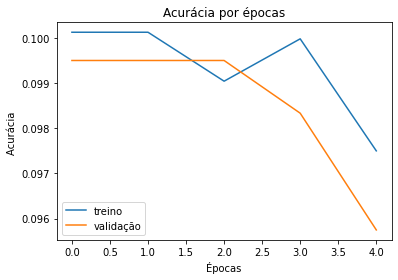

In [31]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia ')
plt.legend(['treino', 'validação'])
plt.show()

### Viéses zerados com pesos aleatórios

In [32]:
modelo.layers[1].set_weights([pesos_dense_1_aleatorios, vieses_dense_1_zerados])
modelo.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')
historico = modelo.fit(imagens_treino_normalizado, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 71.4399 - accuracy: 0.2953 - val_loss: 6.8564 - val_accuracy: 0.6011
Epoch 2/5
1500/1500 [==============================] - 5s 3ms/step - loss: 12.6509 - accuracy: 0.5620 - val_loss: 5.4311 - val_accuracy: 0.6891
Epoch 3/5
1500/1500 [==============================] - 4s 3ms/step - loss: 6.8419 - accuracy: 0.6327 - val_loss: 3.6773 - val_accuracy: 0.6515
Epoch 4/5
1500/1500 [==============================] - 4s 3ms/step - loss: 3.8328 - accuracy: 0.6803 - val_loss: 2.4982 - val_accuracy: 0.7625
Epoch 5/5
1500/1500 [==============================] - 4s 3ms/step - loss: 2.7017 - accuracy: 0.7103 - val_loss: 1.4062 - val_accuracy: 0.7883


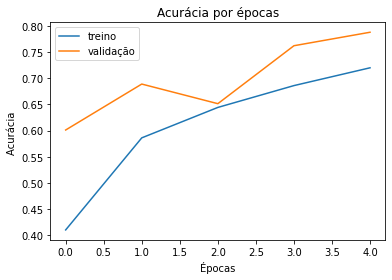

In [33]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acurácia por épocas')
plt.xlabel('Épocas')
plt.ylabel('Acurácia ')
plt.legend(['treino', 'validação'])
plt.show()

### Turning de hiperparâmetros

#### Taxa de aprendizado

In [34]:
adam = keras.optimizers.Adam(lr=0.5)
modelo.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics='accuracy')
historico = modelo.fit(imagens_treino_normalizado, identificacoes_treino, epochs=5, validation_split=0.2)

Epoch 1/5
1500/1500 [==============================] - 5s 3ms/step - loss: 30.1327 - accuracy: 0.1062 - val_loss: 2.3907 - val_accuracy: 0.0983
Epoch 2/5
1500/1500 [==============================] - 5s 4ms/step - loss: 2.3589 - accuracy: 0.1018 - val_loss: 2.3532 - val_accuracy: 0.1030
Epoch 3/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3627 - accuracy: 0.0971 - val_loss: 2.3505 - val_accuracy: 0.1030
Epoch 4/5
1500/1500 [==============================] - 5s 3ms/step - loss: 2.3602 - accuracy: 0.1035 - val_loss: 2.3367 - val_accuracy: 0.0957
Epoch 5/5
1500/1500 [==============================] - 6s 4ms/step - loss: 2.3570 - accuracy: 0.0975 - val_loss: 2.3495 - val_accuracy: 0.0983


#### Batch size

In [37]:
adam = keras.optimizers.Adam(lr=0.002)
modelo.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics='accuracy')
historico = modelo.fit(imagens_treino_normalizado, identificacoes_treino, batch_size=150 ,epochs=5, validation_split=0.2)

Epoch 1/5
320/320 [==============================] - 2s 7ms/step - loss: 2.3089 - accuracy: 0.1009 - val_loss: 2.3029 - val_accuracy: 0.0983
Epoch 2/5
320/320 [==============================] - 2s 6ms/step - loss: 2.3028 - accuracy: 0.0982 - val_loss: 2.3027 - val_accuracy: 0.1003
Epoch 3/5
320/320 [==============================] - 2s 6ms/step - loss: 2.3028 - accuracy: 0.0989 - val_loss: 2.3028 - val_accuracy: 0.1003
Epoch 4/5
320/320 [==============================] - 2s 6ms/step - loss: 2.3027 - accuracy: 0.1007 - val_loss: 2.3028 - val_accuracy: 0.0957
Epoch 5/5
320/320 [==============================] - 2s 6ms/step - loss: 2.3028 - accuracy: 0.0988 - val_loss: 2.3027 - val_accuracy: 0.0957


#### EarlyStopping

In [39]:
adam = keras.optimizers.Adam(lr=0.002)
callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss'), 
             keras.callbacks.ModelCheckpoint(filepath='/content/drive/MyDrive/Colab Notebooks/Alura/melhor_modelo.hdf5', 
                                             monitor='val_loss', 
                                             save_best_only=True)]

modelo.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics='accuracy')
historico = modelo.fit(imagens_treino_normalizado, 
                       identificacoes_treino, 
                       batch_size=150, 
                       epochs=5, 
                       validation_split=0.2, 
                       callbacks=callbacks)

Epoch 1/5
320/320 [==============================] - 3s 7ms/step - loss: 2.3027 - accuracy: 0.0993 - val_loss: 2.3027 - val_accuracy: 0.0957
Epoch 2/5
320/320 [==============================] - 2s 6ms/step - loss: 2.3027 - accuracy: 0.0994 - val_loss: 2.3027 - val_accuracy: 0.0957
